# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# To ensure that the graphs are displayed within the notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Create path to project folder
path = r'/Users/emilycurcio/Desktop/CareerFoundry/Data Immersion/Ach 6 Advanced Analytics and Dashboard Design/04-2024 World Happiness Analysis'

In [8]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_combined.csv'))

In [9]:
# Keep only numerical columns
df = df[['country', 'happiness_score', 'economy', 'family', 'health', 'freedom', 'gov_trust', 'generosity']]

In [10]:
# View data
df.head()

,country,happiness_score,economy,family,health,freedom,gov_trust,generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [11]:
# Set the country as the index of the dataframe
df = df.set_index('country')

In [12]:
df.head()

,happiness_score,economy,family,health,freedom,gov_trust,generosity
country,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


#### Data is cleaned from last exercise.

# 02. The Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [14]:
# Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score

[-1294.0085431990315,
 -488.96439155860617,
 -306.9851354464549,
 -237.62538479969228,
 -194.78309608705766,
 -177.27414997129472,
 -163.0640329667683,
 -152.10483063149758,
 -144.7653274622732]

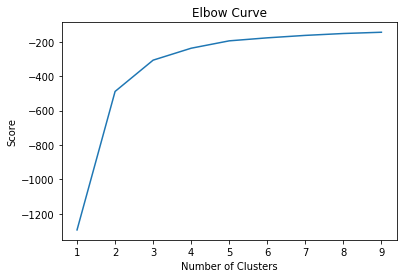

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### After three clusters the curve begins to straighten out, so our optimal number of clusters for this data is three.

# 03 K-Means Algorithm

In [16]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [17]:
# Fit the k-means object to the data
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# Add column with assigned clusters
df['clusters'] = kmeans.fit_predict(df)

In [19]:
df.head()

,happiness_score,economy,family,health,freedom,gov_trust,generosity,clusters
country,,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


In [20]:
df['clusters'].value_counts()

2    308
0    278
1    196
Name: clusters, dtype: int64

# 04. Visualizations of Clustered Data

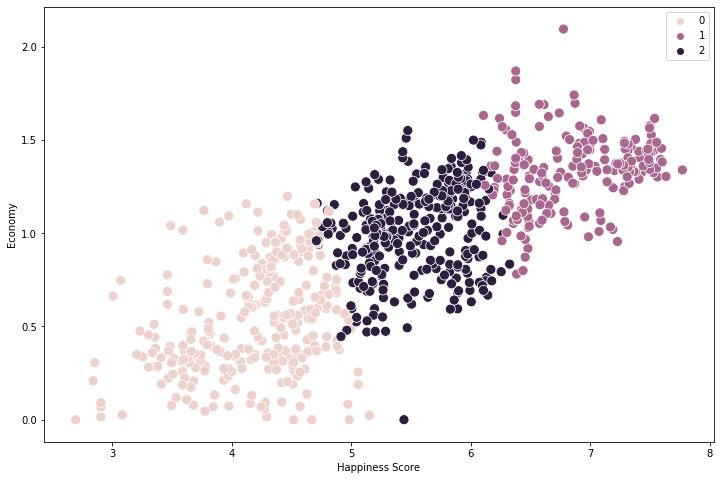

In [21]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df['happiness_score'], y = df['economy'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('Economy')
plt.show()

#### Above we have three distinct clusters, with the pink cluster having low to medium happiness (3 to 5) and lower economy scores, the dark purple having medium happiness (5 to 6.5) and medium economy scores, and the purple having high happiness (6.5 to 8) and high economy scores. The pink cluster has the widest spread of points, perhaps indicating that as happiness score gets higher, any additional increase is considered more significant.

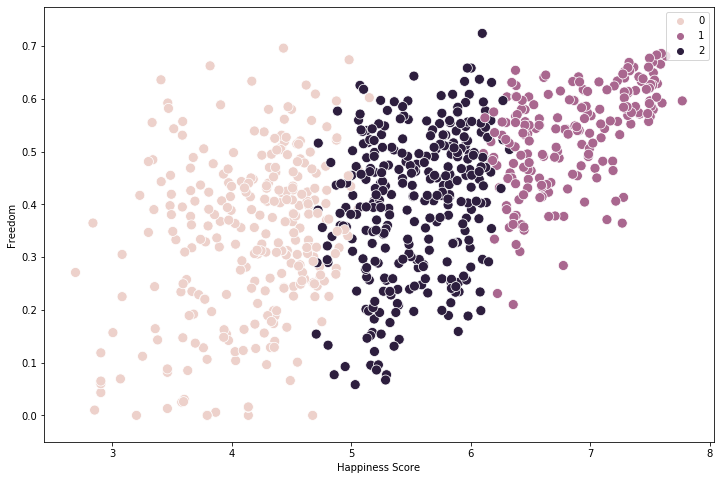

In [22]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df['happiness_score'], y = df['freedom'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.show()

#### Above we can see that when the overall happiness score is low, it is less relevant how freedom was rated, as that will not have much impact on the overall happiness scores. The same is true for when the overall happiness score is medium. Once the overall happiness score gets to be above about 6, then freedom is rated more highly. You can't have a high happiness score with a low freedom score.

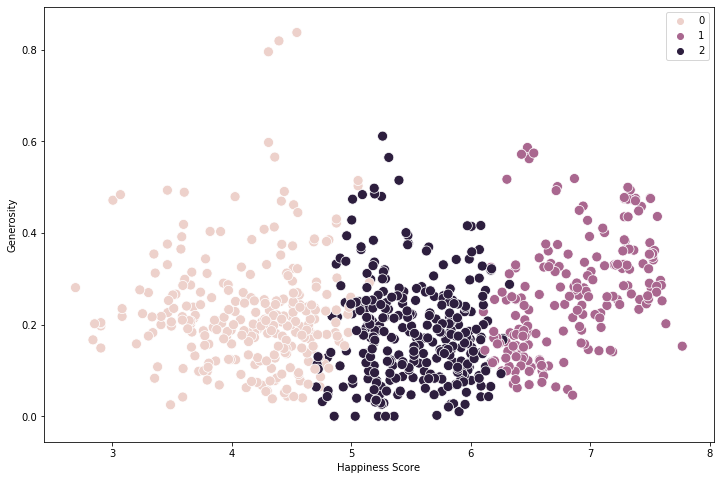

In [23]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize = (12, 8))
ax = sns.scatterplot(x = df['happiness_score'], y = df['generosity'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Happiness Score')
plt.ylabel('Generosity')
plt.show()

#### Above we can see that the generosity score does not have a very significant impact on the overall happiness score of a country. Generostiy is rated between about 0 and 0.4 for most countries, regardless of their overall happiness score. There are some exceptions where generosity is rated higher, however we see these exceptions at all levels of happiness score.

# 05. Descriptive Statisitcs

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
df.head(1)

,happiness_score,economy,family,health,freedom,gov_trust,generosity,clusters,cluster
country,,,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1,purple


In [26]:
df.groupby('cluster').agg({'happiness_score':['mean', 'median'], 
                         'economy':['mean', 'median'], 
                         'family':['mean', 'median'],
                         'health':['mean', 'median'],
                         'freedom':['mean', 'median'],
                         'gov_trust':['mean', 'median'],
                         'generosity':['mean', 'median']})

happiness_score           economy              family            \
                       mean  median      mean    median      mean    median   
cluster                                                                       
dark purple        5.536334  5.5250  1.008559  1.024820  1.164116  1.208447   
pink               4.168288  4.2860  0.518708  0.471775  0.812401  0.847915   
purple             6.849066  6.8385  1.334246  1.343140  1.320958  1.368500   

               health             freedom           gov_trust            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
dark purple  0.684433  0.684500  0.401686  0.418136  0.086027  0.071490   
pink         0.376685  0.359870  0.336245  0.353500  0.106609  0.088420   
purple       0.833598  0.838177  0.532029  0.550068  0.213998  0.185155   

            generosity            
                  mean    median  
cluster                           
dark purple   0.183293  0.172040  
pink          0.223037  0.204015  
purple        0.267693  0.261000

#### The purple cluster has the best stats in all categories. The pink cluster has the worst stats in all categories except in gov_trust it falls in the middle. In some categories such as economy and family, the difference between the means is greater, while in other categories such as generosity, the difference between the means is very small. This could indicate that economy and family scores have a greater impact on a country's overall happiness score relative to the other categories, while the generosity score does not seem to matter much. The purple cluster has a high economy score, from which we could assume that the GDP per capita is higher, with better investments and business opportunities, in the countries belonging to this cluster.

#### Next Steps:
A potential future step could be to run a regression analysis with both economy and family as the independent variables. These seem to contribute the most to the overall happiness score, and perhaps both together could result in a better prediction of happiness than either one alone.

I would also like to look at plotting other variables against happiness score with the clustered data. This may reveal relationships in the data where there initially appear to be none. In the case of freedom, for example, we can see that once happiness hits about 6 we will not have any freedom scores less than 0.3. In contrast, in the case of generostiy we don't see any distinguishing characteristics between each cluster.

In [29]:
# Reset index
df = df.reset_index()

In [30]:
df.head()

,country,happiness_score,economy,family,health,freedom,gov_trust,generosity,clusters,cluster
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1,purple
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1,purple
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1,purple
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1,purple
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1,purple


In [32]:
# Export df with cluster assignments
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_clusters.csv'), index = False)